# Measurement

In [1]:
from sciopy import available_serial_ports, connect_COM_port
from sciopy.sciopy_dataclasses import ScioSpecMeasurementSetup

from src.classes import BallObjectProperties, HitBox, TankProperties32x2
from src.functions import (
    compute_hitbox,
    create_meas_coordinates,
    create_measurement_directory,
    print_coordinates_props,
    save_parameters_to_json_file,
)
from src.visualization import plot_meas_coords, plot_meas_coords_wball

## Define the parameters

In [6]:
# init tank
tank = TankProperties32x2()
# init ball
ball = BallObjectProperties(x=0, y=0, z=0, r=20, material=None)
# init hitbox
hitbox = compute_hitbox(tank, ball, safety_tolerance=0)
# set sciospec measurement properties
ssms = ScioSpecMeasurementSetup(
    burst_count=1,  # The number of measurements to be performed.
    total_meas_num=10,  # Repetitions of burst count
    n_el=64,  # Set 16, 32, 48 or 64 and do not forget to change the channel_group.
    channel_group=[
        1,
        2,
        3,
        4,
    ],  # Use [1] for n_el=16, [1,2] for n_el=32, [1,2,3] for n_el=48, and [1,2,3,4] for n_el=64
    exc_freq=10_000,  # 10,000Hz = 10kHz
    framerate=5,  # Measurements per second
    amplitude=0.01,  # 0.01A = 10mA (maximum)
    inj_skip=8,  # injection electrode skip
    gain=1,
    adc_range=1,  # +/- 1V
    notes="None",  # add measurement information
    configured=False,  # will be set to true after sending config to device
)

print(tank)
print(ball)
print(hitbox)
print(ssms)

TankProperties32x2(T_d=194, T_r=97, T_bx=(-97.0, 97.0), T_by=(-97.0, 97.0), T_bz=(0, 148), E_zr1=50, E_zr2=100, n_el=64)
BallObjectProperties(x=0, y=0, z=0, r=20, material=None)
HitBox(r_min=0, r_max=77.0, x_min=-77.0, x_max=77.0, y_min=-77.0, y_max=77.0, z_min=20, z_max=128)
ScioSpecMeasurementSetup(burst_count=1, total_meas_num=10, n_el=64, channel_group=[1, 2, 3, 4], exc_freq=10000, framerate=5, amplitude=0.01, inj_skip=8, gain=1, adc_range=1, notes='None', configured=False)


In [7]:
coordinates = create_meas_coordinates(hitbox, x_pts=20, y_pts=20, z_pts=10)
print_coordinates_props(coordinates)

HitBox(x_pts,y_pts,z_pts) leads to 2760 available points.
So 2760 points will be measured.
Properties of the computed coordinates
--------------------------------------
min:-68.89	max: 68.89
min:-68.89	max: 68.89
min:20.00	max: 128.00

shape (2760, 3)


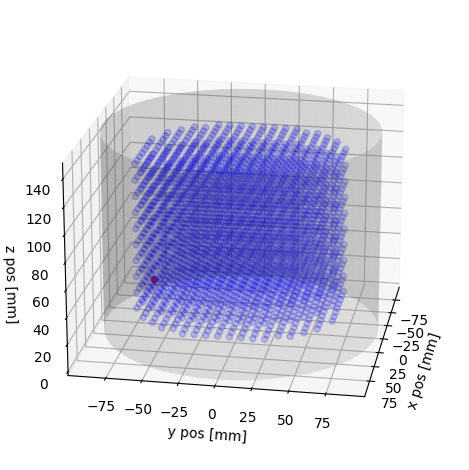

In [8]:
plot_meas_coords(tank=tank, meas_coords=coordinates, p_select=0)

In [9]:
s_path, f_name = create_measurement_directory()
save_parameters_to_json_file(s_path, f_name, ssms, tank, ball, hitbox)

Created new measurement directory at: measurements/12_10_2023_08h_35m
Saved properties to: measurements/12_10_2023_08h_35m/data/


## (TBS) Connect devices

- Create 3D objects
- Init Ender 5
- Centering object depending on size
- Init Sciospec
- Send config to sciospec
- Start Measurement